In [261]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [262]:
pd.options.display.max_columns=100 # to see columns

In [263]:
# Load datasets
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_features = pd.read_csv('features.csv')
df_stores = pd.read_csv('stores.csv')



In [264]:
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [265]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [266]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [267]:
# Merge datasets
df = df_train.merge(df_features, on=['Store', 'Date'], how='inner').merge(df_stores, on='Store', how='inner')


print(df.head(5))

   Store  Dept        Date  Weekly_Sales  IsHoliday_x  Temperature  \
0      1     1  2010-02-05      24924.50        False        42.31   
1      1     1  2010-02-12      46039.49         True        38.51   
2      1     1  2010-02-19      41595.55        False        39.93   
3      1     1  2010-02-26      19403.54        False        46.63   
4      1     1  2010-03-05      21827.90        False        46.50   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.548        NaN        NaN        NaN        NaN        NaN   
2       2.514        NaN        NaN        NaN        NaN        NaN   
3       2.561        NaN        NaN        NaN        NaN        NaN   
4       2.625        NaN        NaN        NaN        NaN        NaN   

          CPI  Unemployment  IsHoliday_y Type    Size  
0  211.096358         8.106        False    A  151315  
1  211.242170         8.106       

In [268]:
df.drop(['IsHoliday_y'], axis=1,inplace=True) 

In [269]:
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True) 

In [270]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [271]:
df.shape

(421570, 16)

In [272]:
# Check for missing values
print(df.isnull().sum())


Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64


In [273]:
df = df.fillna(0)

In [274]:
print(df.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64


In [275]:
# Analyze unique Store and Dept values
unique_stores = df['Store'].nunique()
unique_depts = df['Dept'].nunique()

In [276]:
unique_stores

45

In [277]:
unique_depts

81

In [278]:
df['Date'] = pd.to_datetime(df['Date'])

In [279]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315


In [280]:
store_dept_table = pd.pivot_table(df, index='Store', columns='Dept',
                                  values='Weekly_Sales', aggfunc=np.mean)


In [281]:
store_dept_table

Dept,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,54,55,56,58,59,60,65,67,71,72,74,77,78,79,80,81,82,83,85,87,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,24919.270629,10566.545315,38692.880490,15268.550909,24151.061329,9196.557902,7765.304425,1259.018531,4091.571538,7808.450559,8052.076154,21623.184685,6187.389720,10152.336783,6767.997273,1374.649650,593.113986,4651.040210,3415.295035,2408.533287,8202.668392,5946.431189,11530.831678,2535.730909,1476.203566,2800.495105,79978.222587,NaN,58510.409161,1064.769650,7940.326224,NaN,4872.724406,23.995070,19662.989860,-116.454545,917.727920,11437.931259,NaN,32.712727,2355.439371,90.921053,12817.843357,4000.480629,3372.474476,857.775105,1020.995804,NaN,7436.017343,2732.473357,47390.644895,11652.827413,677.000000,11.500000,33974.792937,17139.314615,29780.696573,20727.860909,5704.048951,3685.875524,46006.277203,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,23382.686154,7735.946294,46117.959231,21314.132937,27005.179650,13790.854196,11687.563009,4053.439930,5748.619441,9910.939860,12923.013846,29170.616573,8309.564545,15299.508392,9347.725105,1837.954615,798.913217,7111.482657,4981.155385,3884.756993,11755.096713,7488.096993,17595.203497,3875.588601,2631.750559,4500.250769,85114.996014,2.340000,78174.560210,2592.220769,8768.857692,NaN,7245.541189,29.139848,29675.324545,18.068182,1358.347914,15568.465664,NaN,16.226667,4148.373566,104.502868,13060.297692,5545.122308,21610.019091,1391.520559,221.545946,NaN,12125.255594,4634.609371,72929.496643,16986.406014,817.500000,11.764000,32759.096993,26041.273566,31000.484266,24647.232587,5710.719650,3672.042797,24932.985804,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,8774.928042,2383.603007,11363.061678,4626.649021,7871.568322,2634.199650,2960.677739,731.313147,1682.199231,1244.529650,3101.769860,10913.330070,2763.627343,4260.447972,2850.050839,500.193636,166.870070,1517.404056,1243.926993,878.475455,4296.111049,3228.155105,4579.719161,1439.325524,622.689371,NaN,108598.364126,NaN,18203.108252,646.832028,4422.944406,NaN,2133.657762,9.922500,6179.259510,38.875000,NaN,17.581481,NaN,5.411803,961.390210,58.311239,7153.737902,1606.808881,NaN,244.878455,138.125874,NaN,2021.482657,1101.610000,22796.856573,3374.960769,424.000000,6.000000,7230.372448,24.420476,1429.300070,6746.578392,19.330000,874.128182,939.435455,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,27145.836643,8141.910979,69596.447343,28567.509441,21270.153007,15815.878042,13146.543790,3038.317762,8888.302867,8865.273147,17289.916294,46234.012867,10875.301189,15640.748531,18429.759930,2579.906154,916.232238,9472.121189,7683.686783,3813.243986,13685.430350,12304.056224,25142.675385,4376.574755,3005.231469,3640.752727,80093.946084,1.560000,78729.263077,975.417622,9511.818531,NaN,5441.563566,13.696939,39128.896154,23.536154,2324.615532,6911.676643,NaN,8.200000,3721.521329,131.887000,18662.627203,6040.540839,6078.142308,1586.446993,410.795105,NaN,12471.426713,7686.018741,101244.450839,20627.307762,344.571429,5.375000,52436.656923,19379.101399,31055.285315,29371.320979,9161.217343,2730.060000,14223.462308,8

In [282]:
df.loc[df['Weekly_Sales'] <= 0, 'Weekly_Sales'] = np.nan


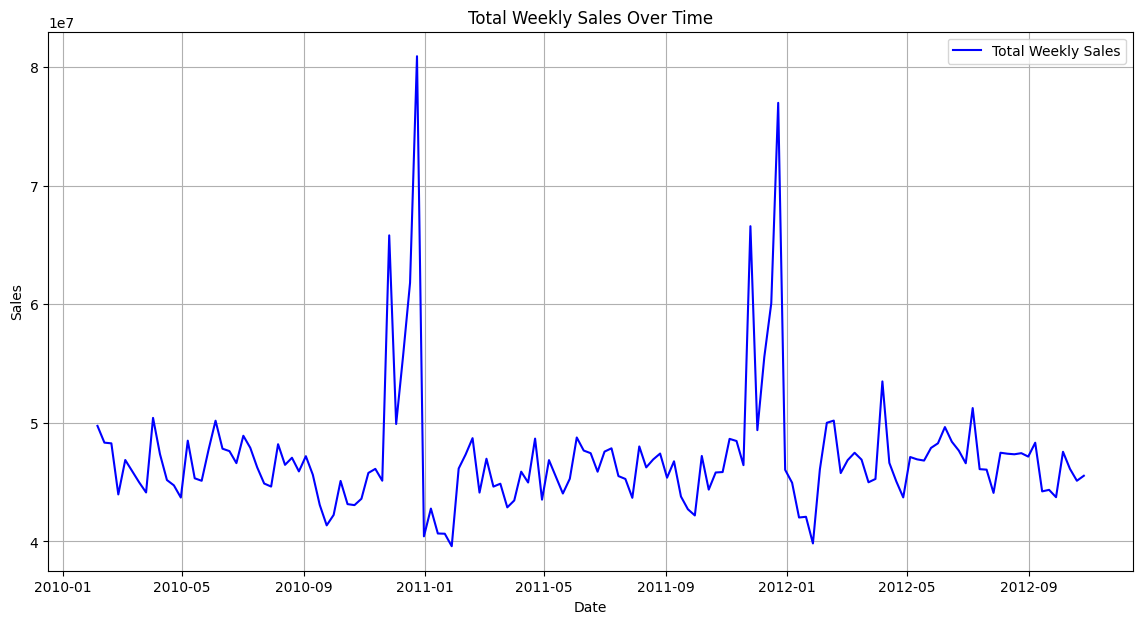

In [283]:
# Aggregate weekly sales over time
weekly_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Plot total weekly sales trends
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(weekly_sales['Date'], weekly_sales['Weekly_Sales'], label='Total Weekly Sales', color='blue')
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()


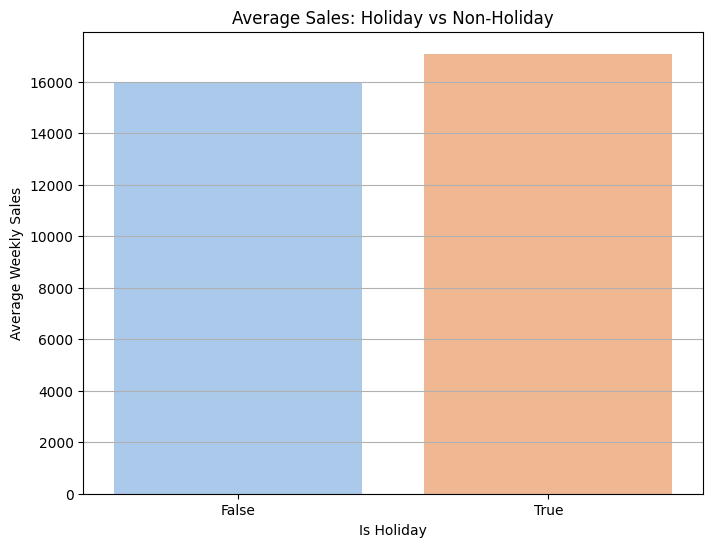

In [193]:
# Group by holiday status and calculate average sales
holiday_sales = df.groupby('IsHoliday')['Weekly_Sales'].mean().reset_index()

# Plot holiday vs non-holiday sales
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.barplot(data=holiday_sales, x='IsHoliday', y='Weekly_Sales', palette='pastel')
plt.title('Average Sales: Holiday vs Non-Holiday')
plt.xlabel('Is Holiday')
plt.ylabel('Average Weekly Sales')
plt.grid(axis='y')
plt.show()


In [284]:
df_not_holiday = df.loc[df['IsHoliday']==False]
df_not_holiday['Date'].nunique() 

133

In [285]:
# Check the data type and sample values of the Date column
print(df['Date'].head())
print(df['Date'].dtype)


0   2010-02-05
1   2010-02-12
2   2010-02-19
3   2010-02-26
4   2010-03-05
Name: Date, dtype: datetime64[ns]
datetime64[ns]


In [286]:
# Define the classify_holiday function with datetime compatibility
def classify_holiday(date):
    if date.strftime('%Y-%m-%d') in ['2010-11-26', '2011-11-25', '2012-09-07']:  # Thanksgiving
        return 'Thanksgiving'
    elif date.strftime('%Y-%m-%d') in ['2010-12-31', '2011-12-30']:  # New Year
        return 'New Year'
    elif date.strftime('%Y-%m-%d') in ['2010-02-12', '2011-02-11', '2012-02-10']:  # Valentine's Day
        return 'Valentine\'s Day'
    elif date.strftime('%Y-%m-%d') in ['2010-09-10', '2011-09-09']:  # Labor Day
        return 'Labor Day'
    else:
        return 'Other'

# Apply the function to classify holidays
df['Holiday_Type'] = df['Date'].apply(classify_holiday)


In [287]:
# Check the holiday classification
print(df['Holiday_Type'].value_counts())


Holiday_Type
Other              391909
Thanksgiving         8925
Valentine's Day      8895
New Year             5946
Labor Day            5895
Name: count, dtype: int64


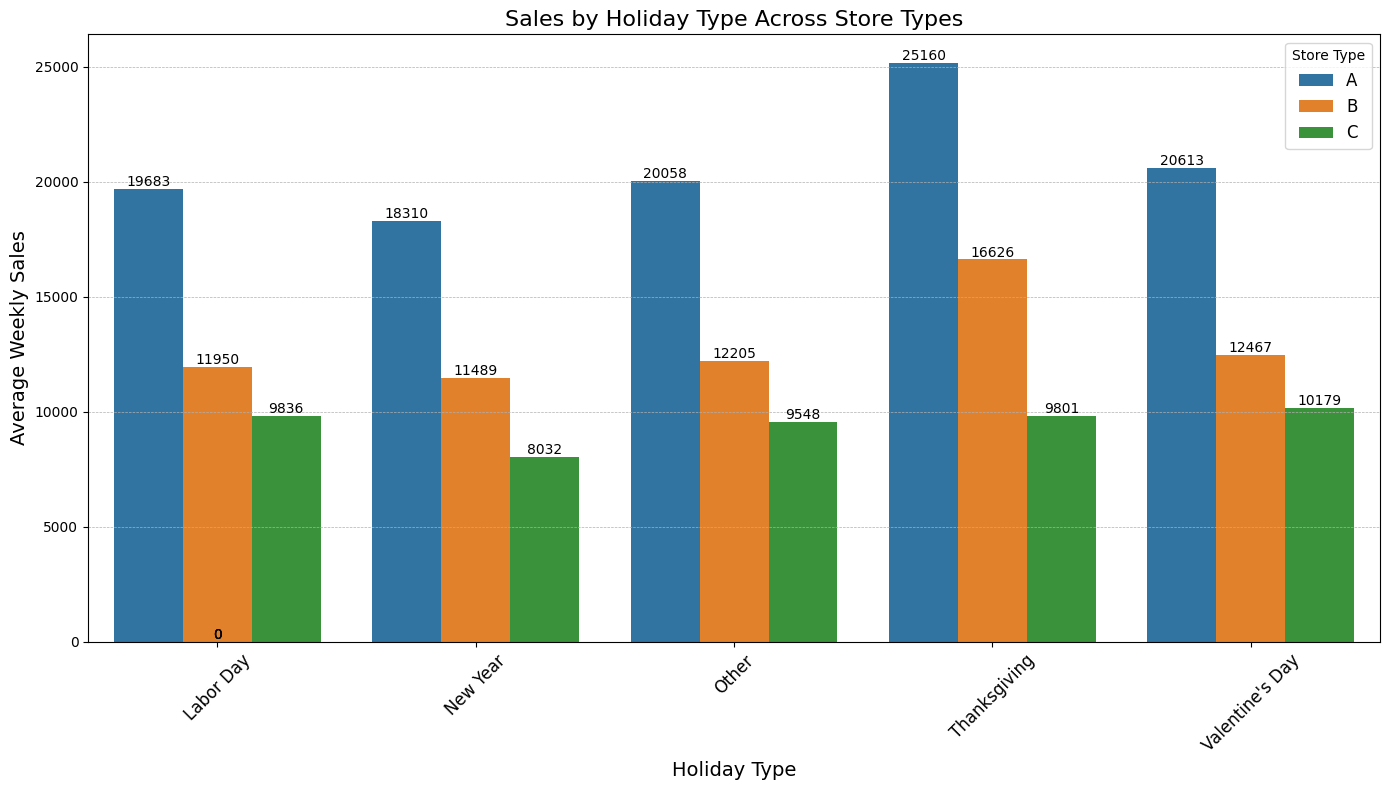

In [288]:
# Group sales by holiday type and store type
holiday_sales_by_type = df.groupby(['Holiday_Type', 'Type'])['Weekly_Sales'].mean().reset_index()

# Create a grouped bar chart
plt.figure(figsize=(14, 8))
sns.barplot(
    data=holiday_sales_by_type,
    x='Holiday_Type',
    y='Weekly_Sales',
    hue='Type'
)

# Add data labels
for p in plt.gca().patches:
    plt.gca().annotate(
        f'{p.get_height():.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=10
    )

# Titles and labels
plt.title('Sales by Holiday Type Across Store Types', fontsize=16)
plt.xlabel('Holiday Type', fontsize=14)
plt.ylabel('Average Weekly Sales', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Store Type', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [289]:
df.groupby('IsHoliday')['Weekly_Sales'].mean()

IsHoliday
False    15952.816352
True     17094.300918
Name: Weekly_Sales, dtype: float64

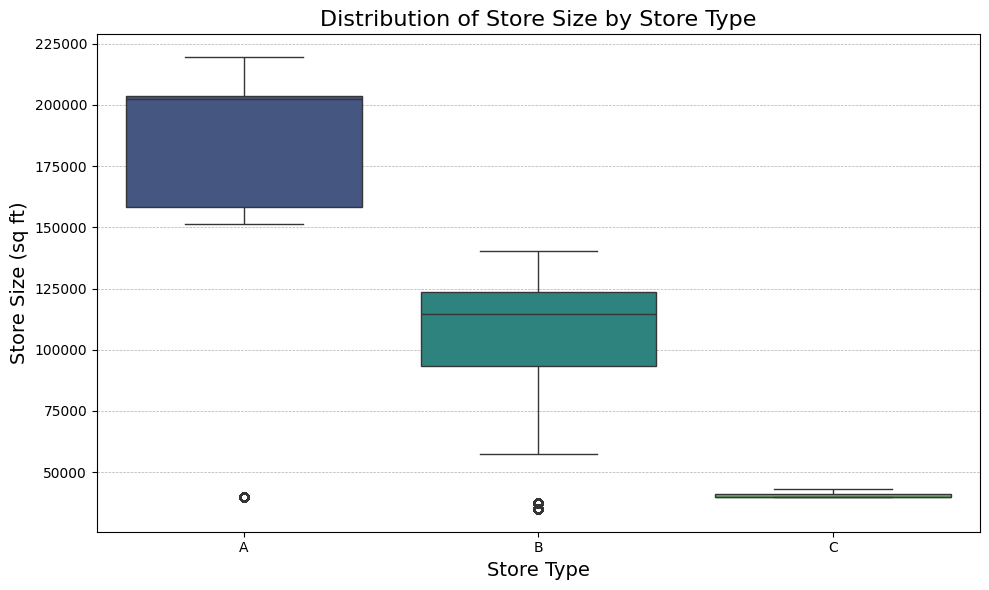

In [290]:
# Boxplot for store size by type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Type', y='Size', palette='viridis')

# Titles and labels
plt.title('Distribution of Store Size by Store Type', fontsize=16)
plt.xlabel('Store Type', fontsize=14)
plt.ylabel('Store Size (sq ft)', fontsize=14)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Percentage of Each Store Type:
Type
A    51.113220
B    38.782409
C    10.104372
Name: proportion, dtype: float64


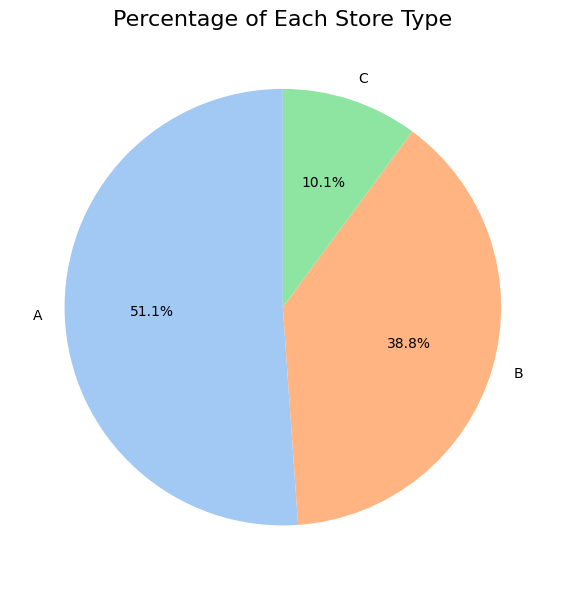

In [291]:
# Calculate the percentage of each store type
store_type_percentage = df['Type'].value_counts(normalize=True) * 100

# Display the percentages
print("Percentage of Each Store Type:")
print(store_type_percentage)

# Visualize the percentages in a pie chart
plt.figure(figsize=(8, 6))
store_type_percentage.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
plt.title('Percentage of Each Store Type', fontsize=16)
plt.ylabel('')  # Hide the y-axis label
plt.tight_layout()
plt.show()


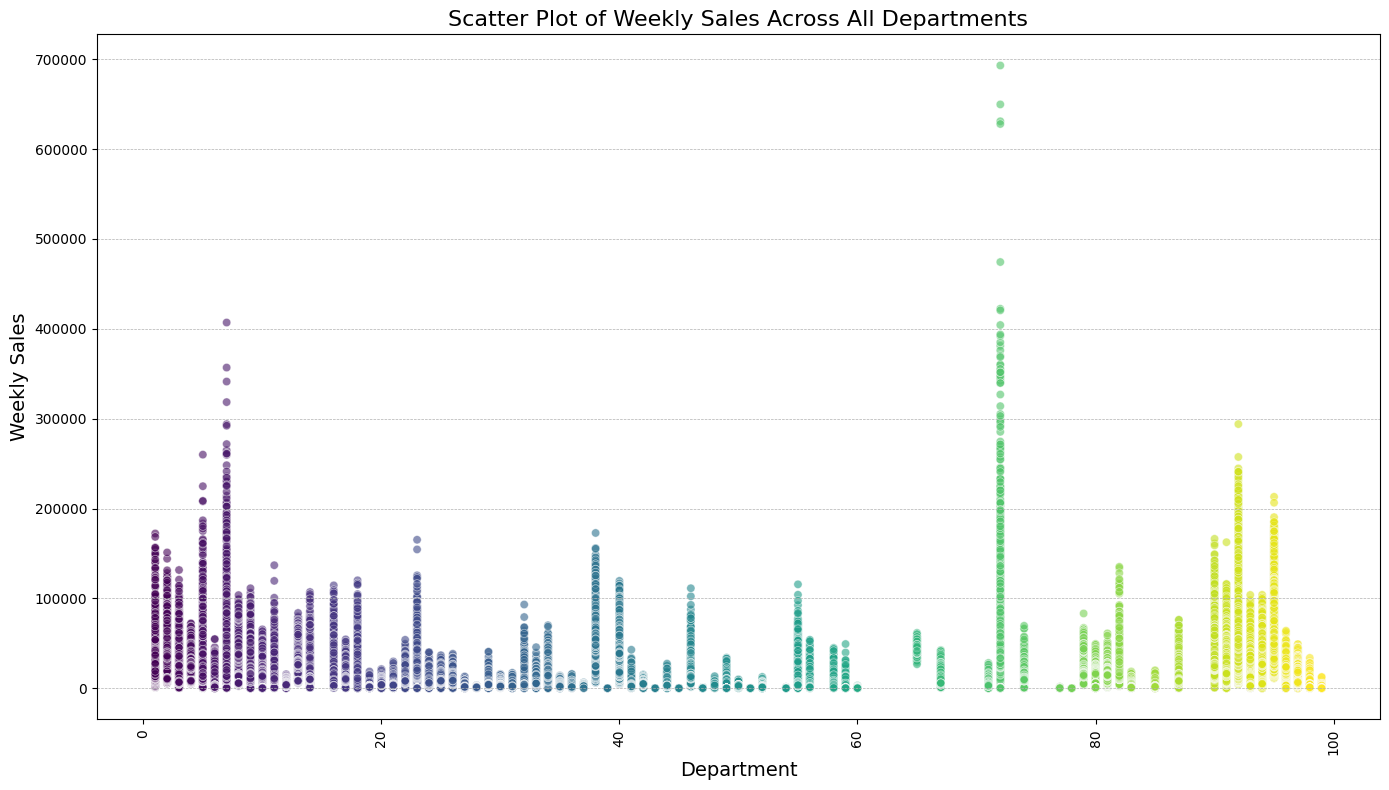

In [292]:
# Scatter plot for weekly sales across all departments
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='Dept', y='Weekly_Sales', alpha=0.6, hue='Dept', palette='viridis', legend=None)

# Titles and labels
plt.title('Scatter Plot of Weekly Sales Across All Departments', fontsize=16)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


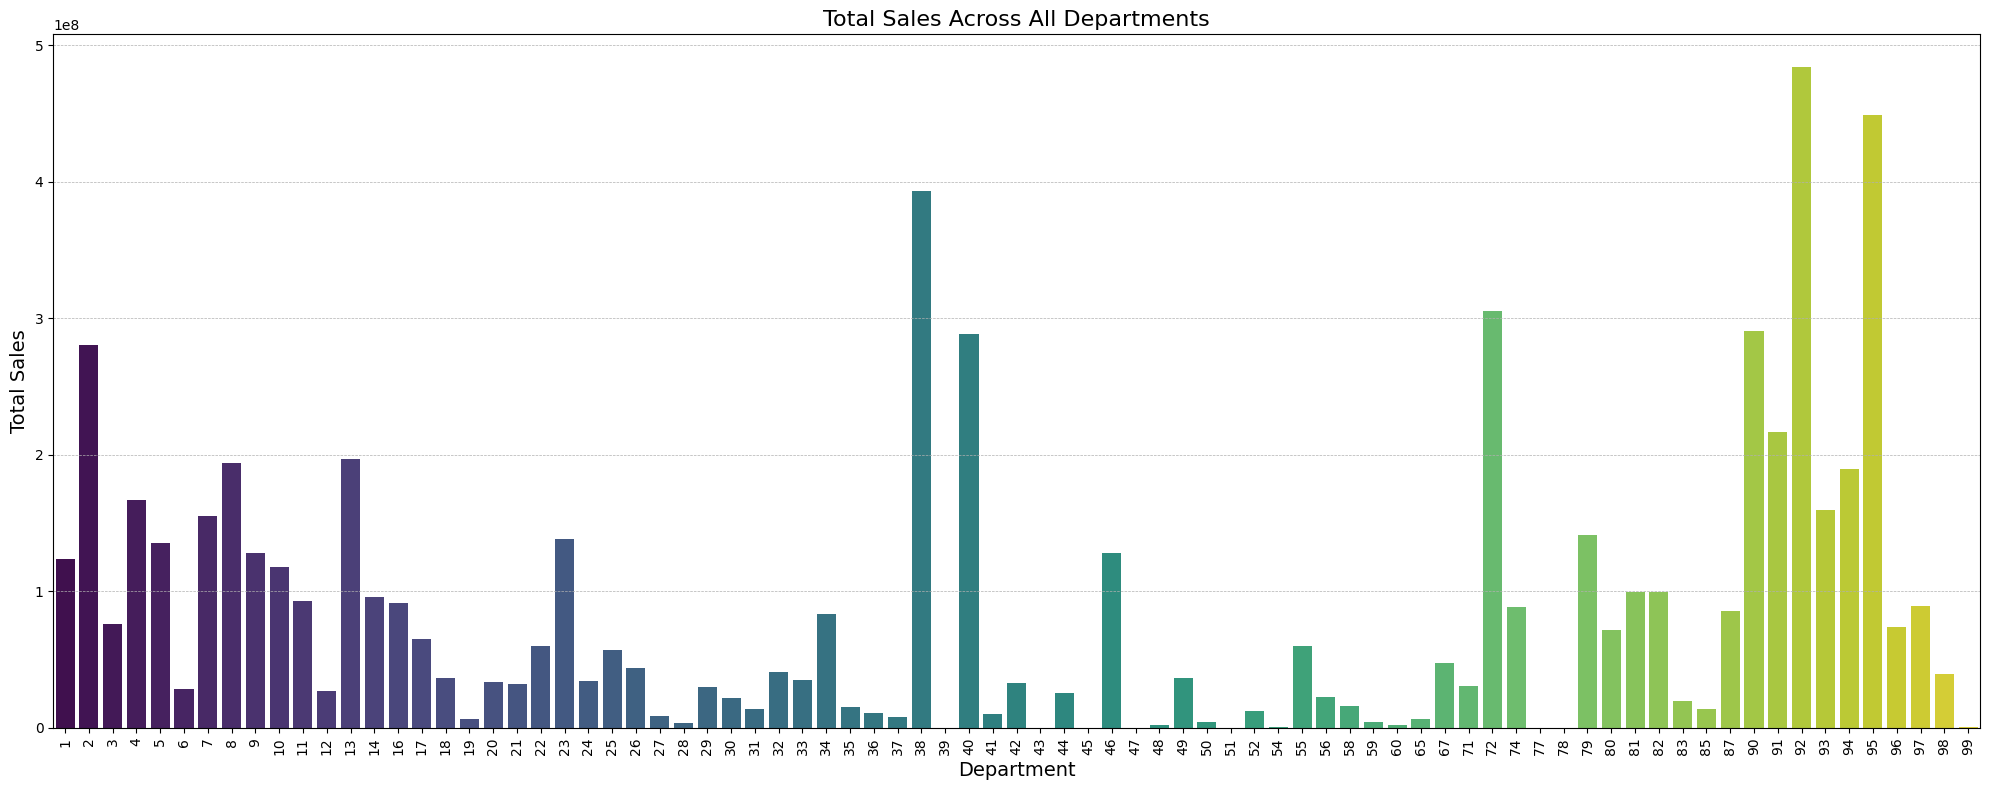

In [293]:
# Aggregate total sales for all departments
dept_total_sales = df.groupby('Dept')['Weekly_Sales'].sum().reset_index()

# Sort by total sales for better visualization
dept_total_sales = dept_total_sales.sort_values(by='Weekly_Sales', ascending=False)

# Bar plot for total sales of all departments
plt.figure(figsize=(20, 8))
sns.barplot(data=dept_total_sales, x='Dept', y='Weekly_Sales', palette='viridis')

# Titles and labels
plt.title('Total Sales Across All Departments', fontsize=16)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


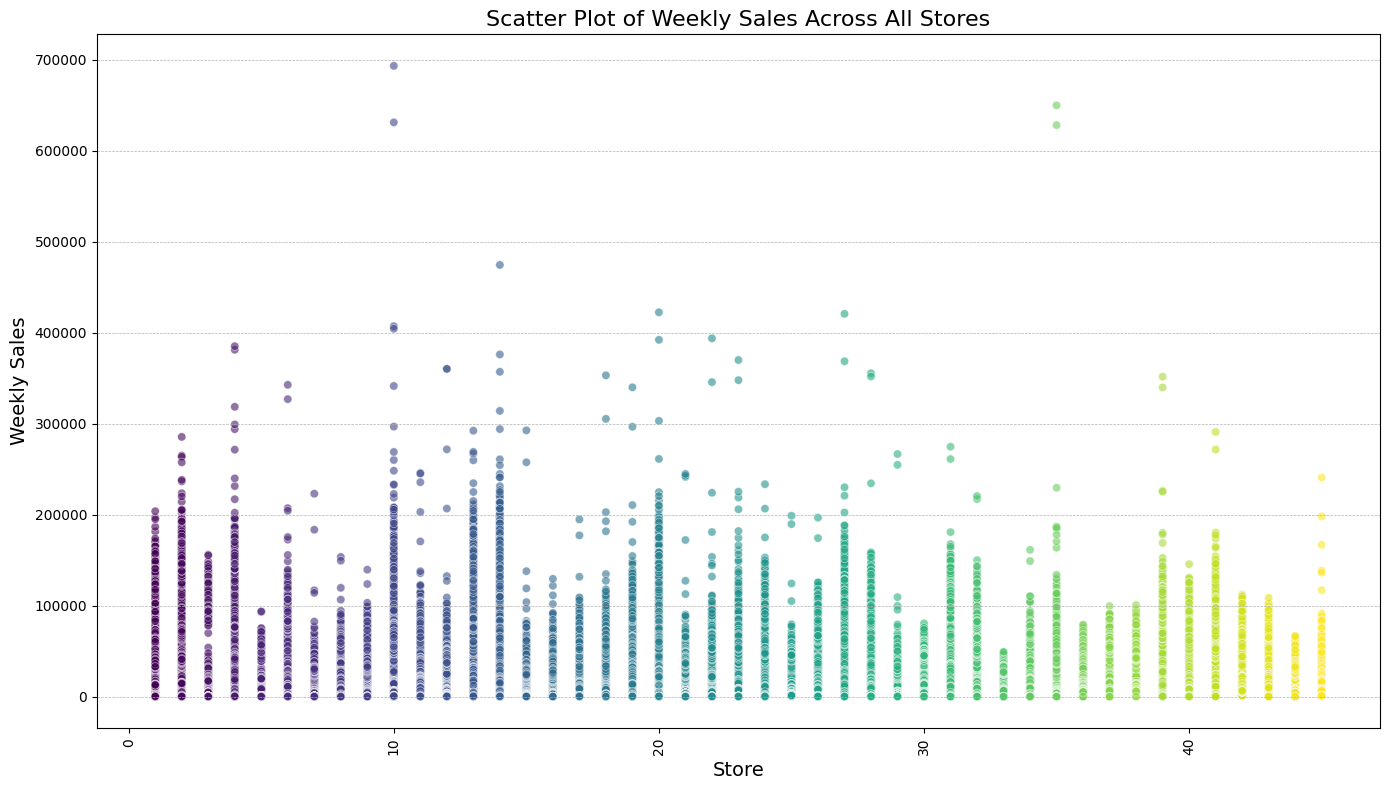

In [294]:
# Scatter plot for weekly sales across all stores
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='Store', y='Weekly_Sales', alpha=0.6, hue='Store', palette='viridis', legend=None)

# Titles and labels
plt.title('Scatter Plot of Weekly Sales Across All Stores', fontsize=16)
plt.xlabel('Store', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


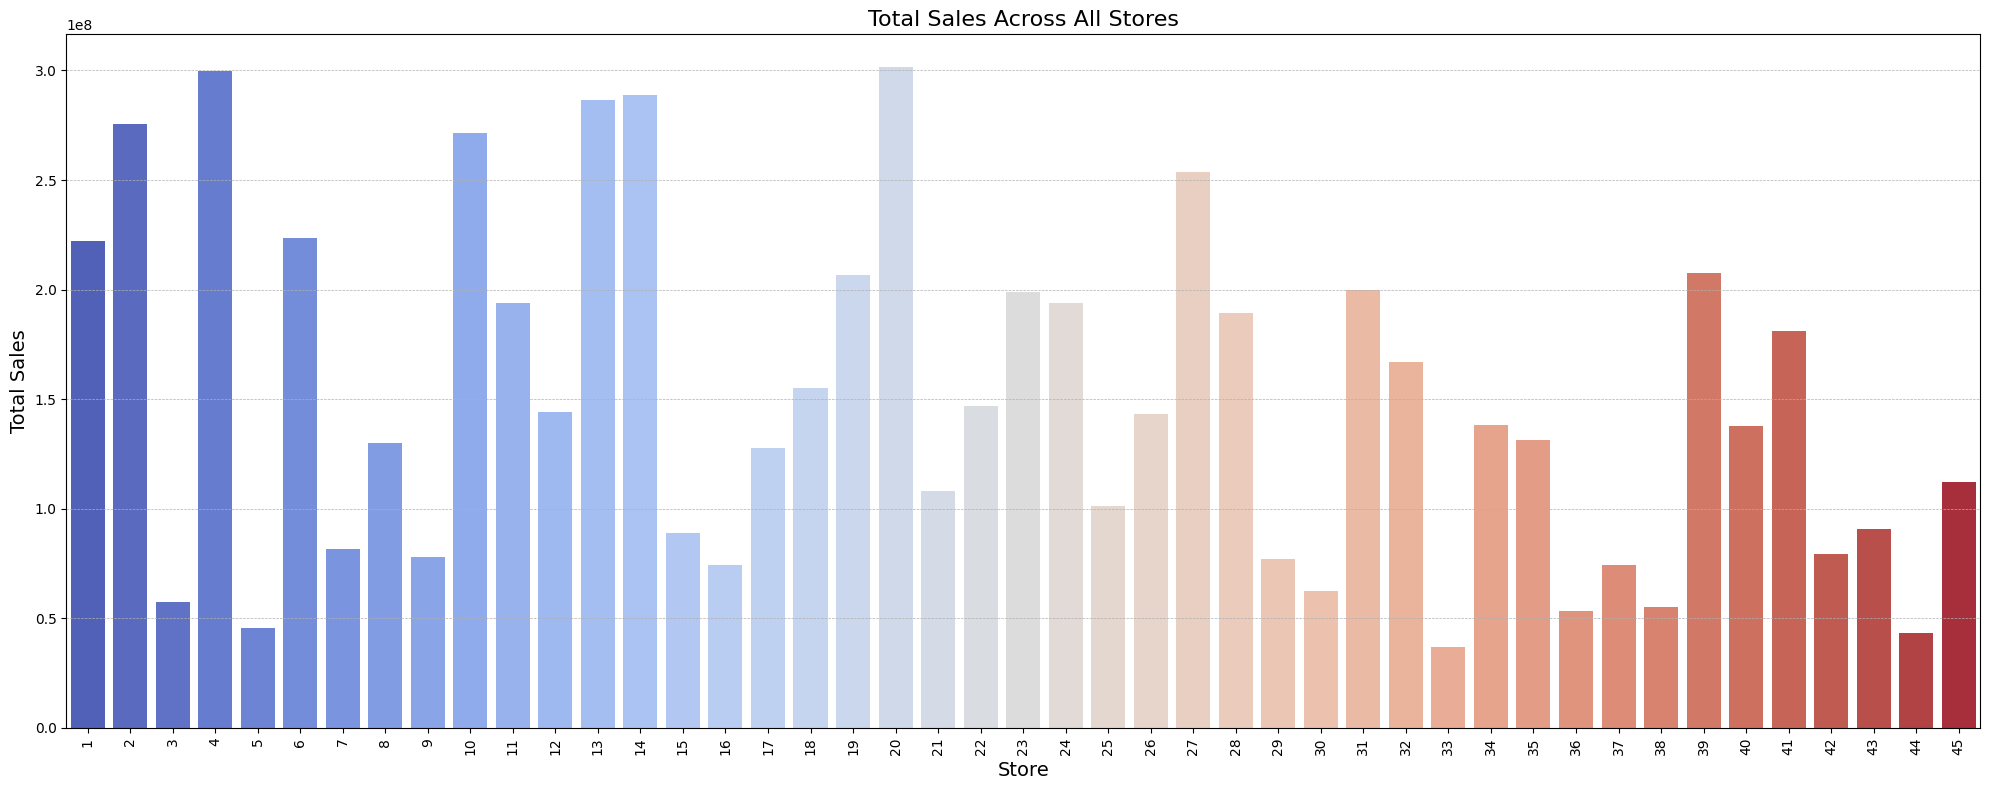

In [295]:
# Aggregate total sales for all stores
store_total_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Sort by total sales for better visualization
store_total_sales = store_total_sales.sort_values(by='Weekly_Sales', ascending=False)

# Bar plot for total sales of all stores
plt.figure(figsize=(20, 8))
sns.barplot(data=store_total_sales, x='Store', y='Weekly_Sales', palette='coolwarm')

# Titles and labels
plt.title('Total Sales Across All Stores', fontsize=16)
plt.xlabel('Store', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


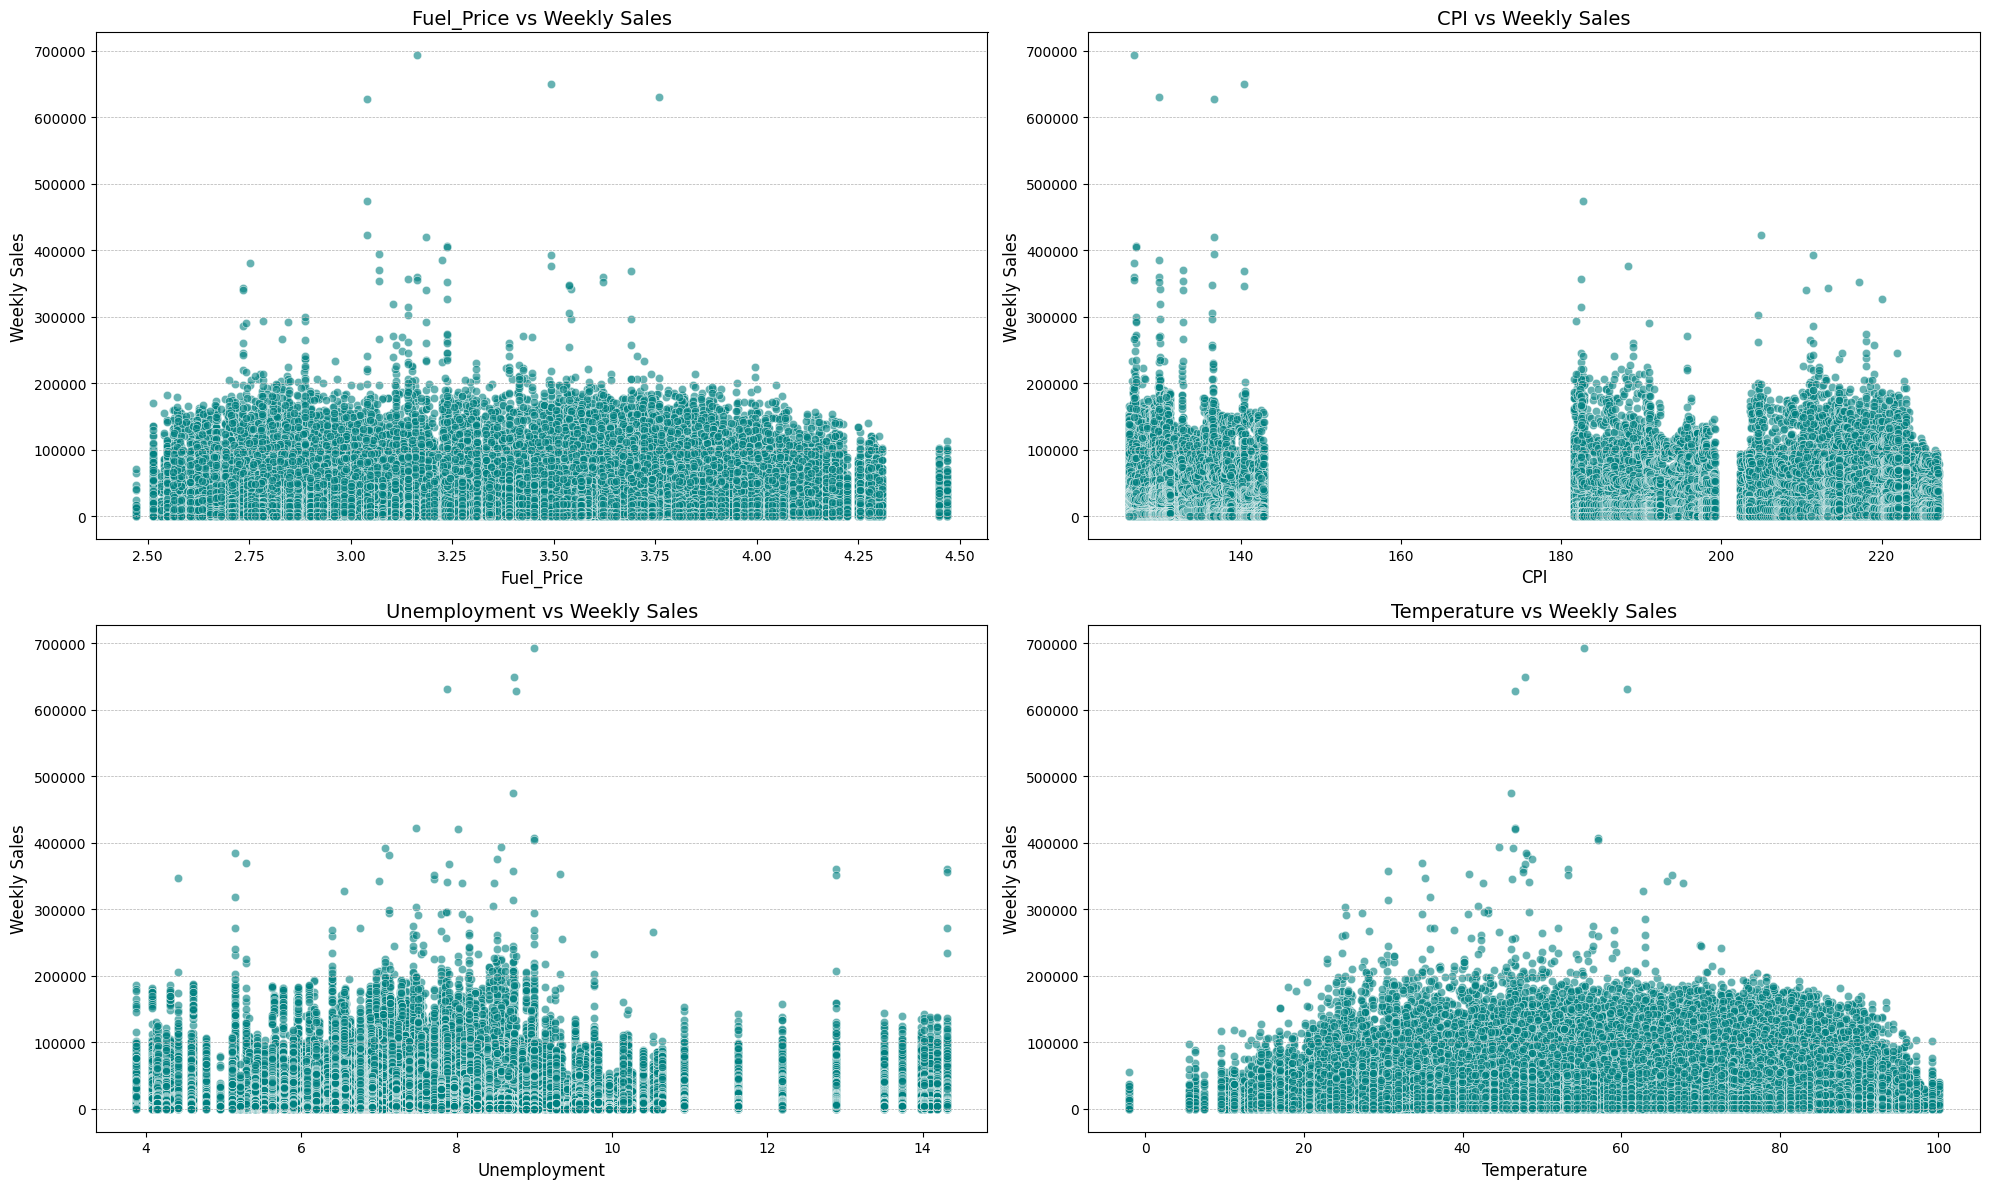

In [296]:
# Scatter plots for external factors vs. weekly sales
factors = ['Fuel_Price', 'CPI', 'Unemployment', 'Temperature']

plt.figure(figsize=(20, 12))
for i, factor in enumerate(factors, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=factor, y='Weekly_Sales', alpha=0.6, color='teal')
    plt.title(f'{factor} vs Weekly Sales', fontsize=14)
    plt.xlabel(factor, fontsize=12)
    plt.ylabel('Weekly Sales', fontsize=12)
    plt.grid(axis='y', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


In [297]:
# Prepare data
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['Day'] = df['Date'].dt.day
df['IsHoliday'] = df['IsHoliday'].astype(bool)

# One-hot encode Holiday_Type
df['IsHoliday'] = df['IsHoliday'].astype(bool).astype(int)


# Scale continuous features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_to_scale = ['Fuel_Price', 'Temperature', 'CPI', 'Unemployment', 'Size']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [298]:
df['IsHoliday'] = df['IsHoliday'].astype(bool).astype(int)


In [299]:
# Replace 'Type' values with numeric mapping
type_group = {'A': 1, 'B': 2, 'C': 3}  # Changing A, B, C to 1, 2, 3
df['Type'] = df['Type'].replace(type_group)

# Verify the changes
print(df['Type'].unique())  # Output: [1, 2, 3]


[1 2 3]


In [300]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Holiday_Type,Year,Month,Week,Day
0,1,1,2010-02-05,24924.50,0,-0.963798,-1.720834,0.0,0.0,0.0,0.0,0.0,1.018774,0.078201,1,0.239209,Other,2010,2,5,5
1,1,1,2010-02-12,46039.49,1,-1.169783,-1.773177,0.0,0.0,0.0,0.0,0.0,1.022498,0.078201,1,0.239209,Valentine's Day,2010,2,6,12
2,1,1,2010-02-19,41595.55,0,-1.092810,-1.847330,0.0,0.0,0.0,0.0,0.0,1.023697,0.078201,1,0.239209,Other,2010,2,7,19
3,1,1,2010-02-26,19403.54,0,-0.729625,-1.744825,0.0,0.0,0.0,0.0,0.0,1.024476,0.078201,1,0.239209,Other,2010,2,8,26
4,1,1,2010-03-05,21827.90,0,-0.736672,-1.605243,0.0,0.0,0.0,0.0,0.0,1.025255,0.078201,1,0.239209,Other,2010,3,9,5


In [301]:
df_new.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Year', 'Month',
       'Week', 'Day'],
      dtype='object')

In [302]:
df_new.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,Day
0,1,1,2010-02-05,24924.50,0,-0.963798,-1.720834,0.0,0.0,0.0,0.0,0.0,1.018774,0.078201,1,0.239209,2010,2,5,5
1,1,1,2010-02-12,46039.49,1,-1.169783,-1.773177,0.0,0.0,0.0,0.0,0.0,1.022498,0.078201,1,0.239209,2010,2,6,12
2,1,1,2010-02-19,41595.55,0,-1.092810,-1.847330,0.0,0.0,0.0,0.0,0.0,1.023697,0.078201,1,0.239209,2010,2,7,19
3,1,1,2010-02-26,19403.54,0,-0.729625,-1.744825,0.0,0.0,0.0,0.0,0.0,1.024476,0.078201,1,0.239209,2010,2,8,26
4,1,1,2010-03-05,21827.90,0,-0.736672,-1.605243,0.0,0.0,0.0,0.0,0.0,1.025255,0.078201,1,0.239209,2010,3,9,5


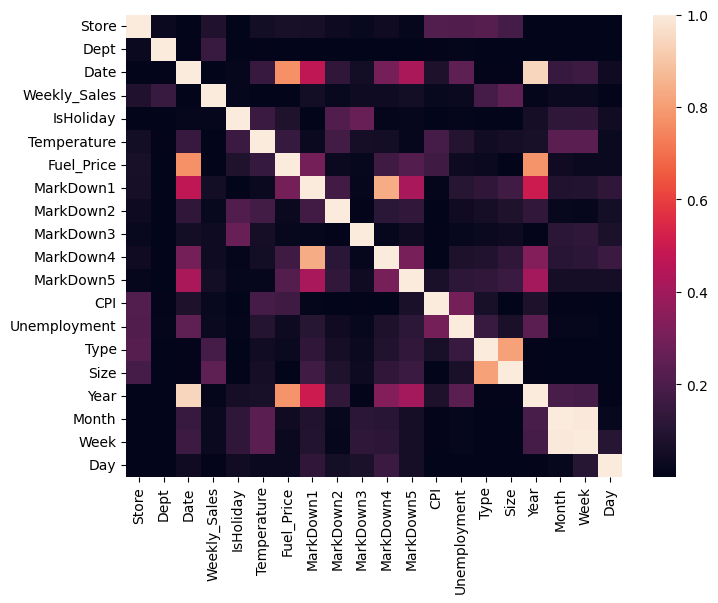

In [303]:
plt.figure(figsize = (8,6))
sns.heatmap(df_new.corr().abs())    # To see the correlations
plt.show()

In [304]:
# List of low-correlation columns to drop (excluding Temperature for now)
low_corr_columns = ['MarkDown2', 'MarkDown3', 'CPI', 'Unemployment']

# Drop the columns
filtered_data = df_new.drop(columns=low_corr_columns)

# Verify the remaining columns
print(f"Columns dropped: {low_corr_columns}")
print(f"Remaining columns: {filtered_data.columns.tolist()}")


Columns dropped: ['MarkDown2', 'MarkDown3', 'CPI', 'Unemployment']
Remaining columns: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown4', 'MarkDown5', 'Type', 'Size', 'Year', 'Month', 'Week', 'Day']


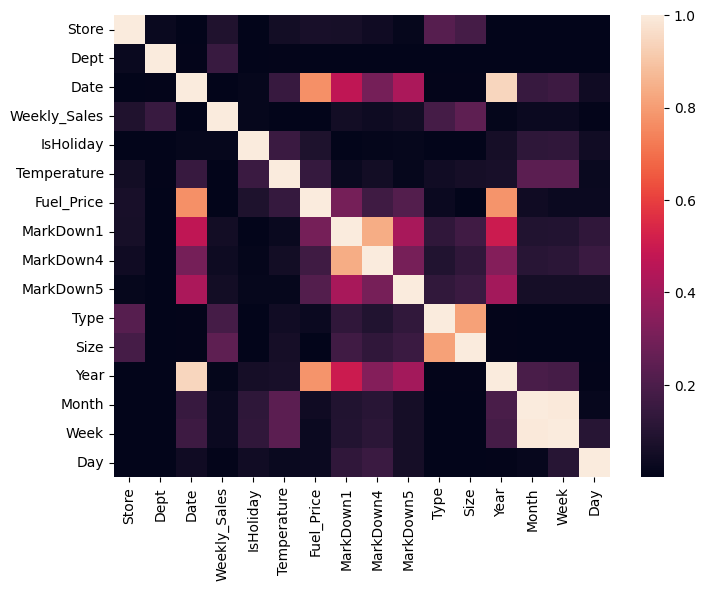

In [305]:
plt.figure(figsize = (8,6))
sns.heatmap(filtered_data.corr().abs())    # To see the correlations
plt.show()

In [306]:
# Check for missing values in the target column
print(f"Number of missing values in Weekly_Sales: {filtered_data['Weekly_Sales'].isna().sum()}")


Number of missing values in Weekly_Sales: 1358


In [307]:
# Drop rows with missing Weekly_Sales values
filtered_data = filtered_data.dropna(subset=['Weekly_Sales'])


In [308]:
from sklearn.model_selection import train_test_split

# Define features and target
features = filtered_data.drop(columns=['Weekly_Sales', 'Date'])  # Exclude target and date
target = filtered_data['Weekly_Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, shuffle=False)


In [309]:
# Define WMAE function
def calculate_wmae(y_true, y_pred, weights):
    """Calculate Weighted Mean Absolute Error."""
    return (weights * abs(y_true - y_pred)).sum() / weights.sum()


In [310]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Extract weights for WMAE
weights = X_test['IsHoliday'].apply(lambda x: 5 if x == 1 else 1)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
wmae = calculate_wmae(y_test, y_pred, weights)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"WMAE: {wmae}")


MAE: 4398.902106527611
MSE: 88757576.51718804
RMSE: 9421.12395190659
WMAE: 4485.161615479166


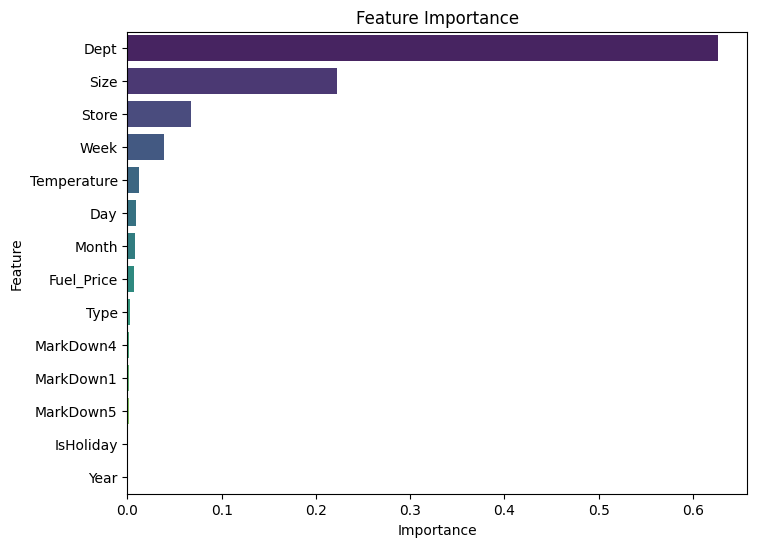

In [311]:
# Feature Importance
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(8, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance')
plt.show()


In [312]:
# Select the refined features
selected_features = ['Dept', 'Size', 'Store', 'Week', 'Day','Temperature','Type','Month','IsHoliday']

# Prepare the feature matrix and target variable
X_selected = filtered_data[selected_features]
y_selected = filtered_data['Weekly_Sales']

# Train-test split
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(
    X_selected, y_selected, test_size=0.2, random_state=42, shuffle=False
)


In [313]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model with selected features
rf_model_sel = RandomForestRegressor(
    n_estimators=250, 
    max_depth=59, 
    min_samples_split=5,     
    min_samples_leaf=3, 
    random_state=42
)
rf_model_sel.fit(X_train_sel, y_train_sel)

# Predict on the test set
y_pred_sel = rf_model_sel.predict(X_test_sel)


In [314]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Extract weights for WMAE
weights_sel = X_test_sel['Type'].apply(lambda x: 5 if x == 1 else 1)

# Calculate metrics
mae_sel = mean_absolute_error(y_test_sel, y_pred_sel)
mse_sel = mean_squared_error(y_test_sel, y_pred_sel)
rmse_sel = mse_sel ** 0.5
wmae_sel = calculate_wmae(y_test_sel, y_pred_sel, weights_sel)

# Print metrics
print(f"MAE (Selected Features): {mae_sel}")
print(f"MSE (Selected Features): {mse_sel}")
print(f"RMSE (Selected Features): {rmse_sel}")
print(f"WMAE (Selected Features): {wmae_sel}")


MAE (Selected Features): 4397.818224934625
MSE (Selected Features): 86788158.36630608
RMSE (Selected Features): 9316.016228319168
WMAE (Selected Features): 4744.82759191937


In [315]:
print(f"Original WMAE: {wmae}")
print(f"Refined Features WMAE: {wmae_sel}")


Original WMAE: 4485.161615479166
Refined Features WMAE: 4744.82759191937
